In [40]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.stats as sts
import math

In [65]:
def plot_all(dfs, key='Perf'):
    for df in dfs:
        value = df[key]
        plt.plot(range(len(value)), value)
        plt.xlabel('Iterations')
        plt.ylabel(key)
    plt.show()

def moments(dfs):
    cdf = pd.concat(dfs).groupby(level=0)
    return cdf.mean(), cdf.std()
    
def plot_ci(dfs, conf=0.95, key='Perf'):
    n_runs = len(dfs)
    mean_df, std_df = moments(dfs)
    mean = mean_df[key]
    std = std_df[key]
    plt.plot(range(len(mean)), mean)
    interval = sts.t.interval(conf, n_runs-1,loc=mean,scale=std/math.sqrt(n_runs))
    plt.fill_between(range(len(mean)), interval[0], interval[1], alpha=0.3)
    plt.show()

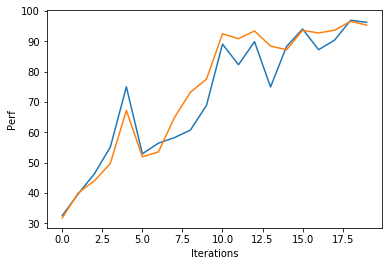

In [66]:
common_path = '../logs/'
file_names = ['test_gpomdp_1547419904', 'test_gpomdp_1547420082']
dfs = [pd.read_csv(common_path + fn + '.csv') for fn in file_names]
plot_all(dfs)

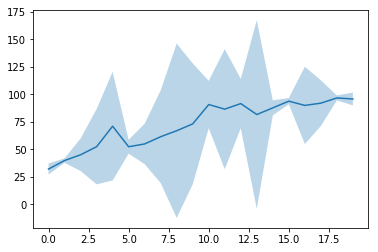

In [67]:
plot_ci(dfs)